# PROJECT on Logistic Regression

# Vaccine Usage Prediction

# Prediction of how likely it is that the people will take an H1N1 flu vaccine using Logistic Regression.

## Abstract:
Subjects receiving the same vaccine often show different levels of immune responses 
and some may even present adverse side effects to the vaccine. Systems vaccinology can 
combine omics data and machine learning techniques to obtain highly predictive 
signatures of vaccine immunogenicity and reactogenicity. Currently, several machine 
learning methods are already available to researchers with no background in 
bioinformatics.

## Problem Statement:
Predict how likely it is that the people will take an H1N1 flu vaccine using Logistic 
Regression.

## Dataset Information:
The data is about the technical specifications of cars.

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory data analysis

In [1]:
#data given - Vaccine Usage Prediction
#data is given in csv format
#data should be read by using pandas 

# Read Data using Pandas

In [5]:
my_data= pd.read_csv("h1n1_vaccine_prediction.csv")
my_data

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


# to check for the type

In [7]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [8]:
#dtypes: float64(23), int64(2), object(9)

# to show all count,mean,std,min,etc.,

In [10]:
my_data.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


# Check for Null is present or not

In [12]:
my_data.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [13]:
#Null values present

# dropping the high null values present column

In [15]:
my_data=my_data.drop("has_health_insur",axis=1)
my_data

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [20]:
my_data.isnull().sum()

unique_id                       0
h1n1_worry                     92
h1n1_awareness                116
antiviral_medication           71
contact_avoidance             208
bought_face_mask               19
wash_hands_frequently          42
avoid_large_gatherings         87
reduced_outside_home_cont      82
avoid_touch_face              128
dr_recc_h1n1_vacc            2160
dr_recc_seasonal_vacc        2160
chronic_medic_condition       971
cont_child_undr_6_mnths       820
is_health_worker              804
is_h1n1_vacc_effective        391
is_h1n1_risky                 388
sick_from_h1n1_vacc           395
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc           537
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment                   1463
census_msa    

# To remove null values

In [22]:
my_data.dropna(inplace=True,axis=0)

In [23]:
my_data.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

In [24]:
#No nulls present

# Data Pre-processing

In [25]:
# We have characters in our dataset
#To convert character to integer
#Two methods
#Label encoder
#Dummy variable

# Label Encoder

In [27]:
# To change the categorical variable string or object , Label Encoder is used to convert String to numeric

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
LE=LabelEncoder()

In [30]:
my_data['age_bracket']=LE.fit_transform(my_data.age_bracket)
my_data['qualification']=LE.fit_transform(my_data.qualification)
my_data['race']=LE.fit_transform(my_data.race)
my_data['sex']=LE.fit_transform(my_data.sex)
my_data['income_level']=LE.fit_transform(my_data.income_level)
my_data['marital_status']=LE.fit_transform(my_data.marital_status)
my_data['housing_status']=LE.fit_transform(my_data.housing_status)
my_data['employment']=LE.fit_transform(my_data.employment)
my_data['census_msa']=LE.fit_transform(my_data.census_msa)

In [31]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  19642 non-null  int64  
 1   h1n1_worry                 19642 non-null  float64
 2   h1n1_awareness             19642 non-null  float64
 3   antiviral_medication       19642 non-null  float64
 4   contact_avoidance          19642 non-null  float64
 5   bought_face_mask           19642 non-null  float64
 6   wash_hands_frequently      19642 non-null  float64
 7   avoid_large_gatherings     19642 non-null  float64
 8   reduced_outside_home_cont  19642 non-null  float64
 9   avoid_touch_face           19642 non-null  float64
 10  dr_recc_h1n1_vacc          19642 non-null  float64
 11  dr_recc_seasonal_vacc      19642 non-null  float64
 12  chronic_medic_condition    19642 non-null  float64
 13  cont_child_undr_6_mnths    19642 non-null  flo

In [32]:
# Object data type converted to integer data type

# Univariate and Bivariate Analysis

# Correlation

In [35]:
my_data_corr = my_data.corr()
my_data_corr

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
unique_id,1.000000,0.015039,0.003837,-0.006505,0.008889,-0.008745,0.013715,0.004926,0.010465,0.004628,...,-0.003081,0.007151,-0.000447,-0.007461,-0.004717,-0.007546,0.004217,0.002571,-0.002546,-0.002564
h1n1_worry,0.015039,1.000000,0.059023,0.090782,0.235204,0.162740,0.293807,0.264525,0.252513,0.249776,...,-0.138008,-0.140634,0.051541,-0.037674,0.001543,0.063658,0.001952,-0.016045,0.048792,0.134136
h1n1_awareness,0.003837,0.059023,1.000000,-0.007402,0.071382,0.037583,0.084454,-0.044571,-0.069281,0.085656,...,0.159728,-0.090490,-0.048729,-0.119238,-0.129561,-0.130574,-0.059204,0.012606,0.053608,0.125878
antiviral_medication,-0.006505,0.090782,-0.007402,1.000000,0.045012,0.145122,0.059663,0.106117,0.124120,0.064138,...,-0.119113,-0.012273,0.073540,0.019969,0.072057,0.009879,0.016787,0.041534,0.080335,0.036202
contact_avoidance,0.008889,0.235204,0.071382,0.045012,1.000000,0.061104,0.336035,0.227655,0.223418,0.328064,...,-0.003287,-0.124459,0.005424,-0.056189,-0.033846,0.026455,-0.023196,0.013944,0.039898,0.044053
bought_face_mask,-0.008745,0.162740,0.037583,0.145122,0.061104,1.000000,0.077821,0.181502,0.167205,0.107283,...,-0.088761,-0.048235,0.049560,0.005343,0.053974,0.036373,-0.004213,0.016216,0.005850,0.075303
wash_hands_frequently,0.013715,0.293807,0.084454,0.059663,0.336035,0.077821,1.000000,0.193549,0.191407,0.365312,...,-0.067637,-0.168138,0.019699,-0.048730,-0.022973,0.003264,-0.011314,0.006272,0.041377,0.075384
avoid_large_gatherings,0.004926,0.264525,-0.044571,0.106117,0.227655,0.181502,0.193549,1.000000,0.587728,0.244823,...,-0.122248,-0.056706,0.023563,0.025693,0.055086,0.145750,0.047392,-0.032031,-0.010426,0.020589
reduced_outside_home_cont,0.010465,0.252513,-0.069281,0.124120,0.223418,0.167205,0.191407,0.587728,1.000000,0.262231,...,-0.139519,-0.044241,0.049328,0.029166,0.072339,0.156708,0.033533,-0.027936,-0.010334,0.017272
avoid_touch_face,0.004628,0.249776,0.085656,0.064138,0.328064,0.107283,0.365312,0.244823,0.262231,1.000000,...,-0.059859,-0.178853,-0.001153,-0.038495,-0.021259,0.028547,0.008451,-0.002907,0.020962,0.071344


# Graphical representation

# Graph 1 : CountPlot

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

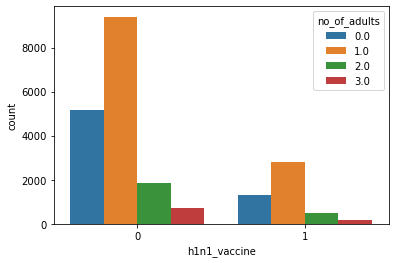

In [39]:
sns.countplot(x='h1n1_vaccine',hue='no_of_adults',data=my_data)

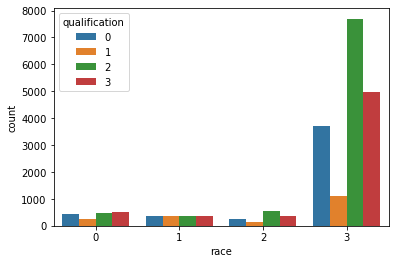

In [40]:
sns.countplot(x='race',hue='qualification',data=my_data);

<AxesSubplot:xlabel='income_level', ylabel='count'>

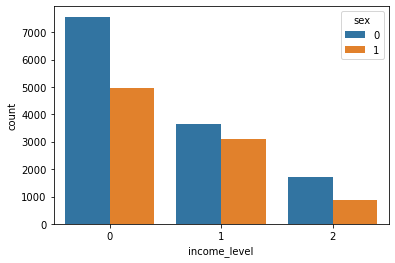

In [41]:
sns.countplot(x='income_level',hue='sex',data=my_data)

# Graph 2 : scatter plot

Text(0.5, 1.0, 'unique_id vs h1n1_vaccine')

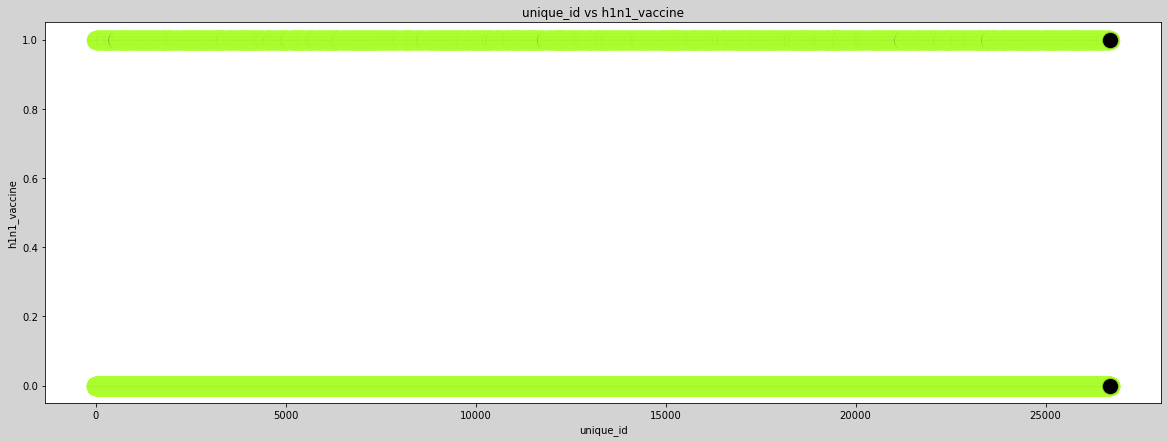

In [43]:
plt.figure(figsize=(20,7),facecolor='lightgrey')
plt.scatter(my_data.unique_id,my_data.h1n1_vaccine,color='Black',alpha=0.8,edgecolors='greenyellow',
           linewidths=2,s=300)
plt.xlabel("unique_id")
plt.ylabel("h1n1_vaccine")
plt.title ("unique_id vs h1n1_vaccine")

Text(0.5, 1.0, 'unique_id vs h1n1_vaccine')

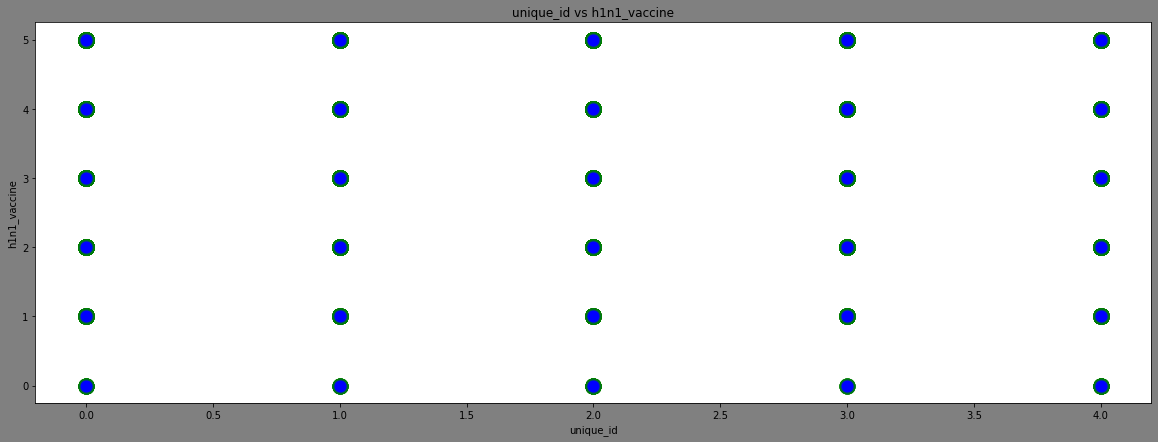

In [44]:
plt.figure(figsize=(20,7),facecolor='grey')
plt.scatter(my_data.age_bracket,my_data.is_h1n1_vacc_effective,color='Blue',alpha=0.6,edgecolors='green',
           linewidths=2,s=200)
plt.xlabel("unique_id")
plt.ylabel("h1n1_vaccine")
plt.title ("unique_id vs h1n1_vaccine")

# Graph 3 : Histogram

<AxesSubplot:ylabel='Frequency'>

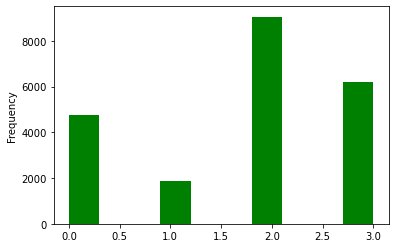

In [46]:
my_data.qualification.plot.hist(color='green')

<AxesSubplot:ylabel='Frequency'>

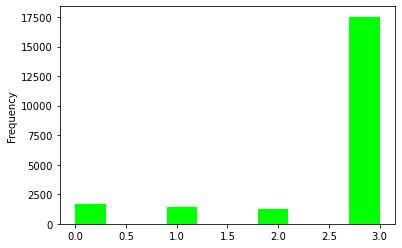

In [47]:
my_data.race.plot.hist(color='lime')

<AxesSubplot:ylabel='Frequency'>

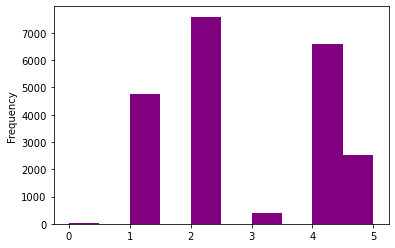

In [48]:
my_data.is_seas_risky.plot.hist(color='purple')

<AxesSubplot:ylabel='Frequency'>

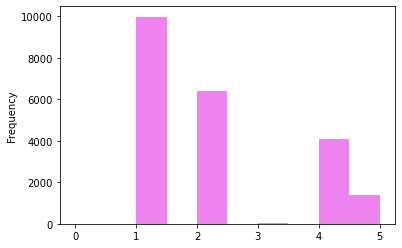

In [49]:
my_data.sick_from_seas_vacc.plot.hist(color='violet')

# Graph 4 : HeatMap is used

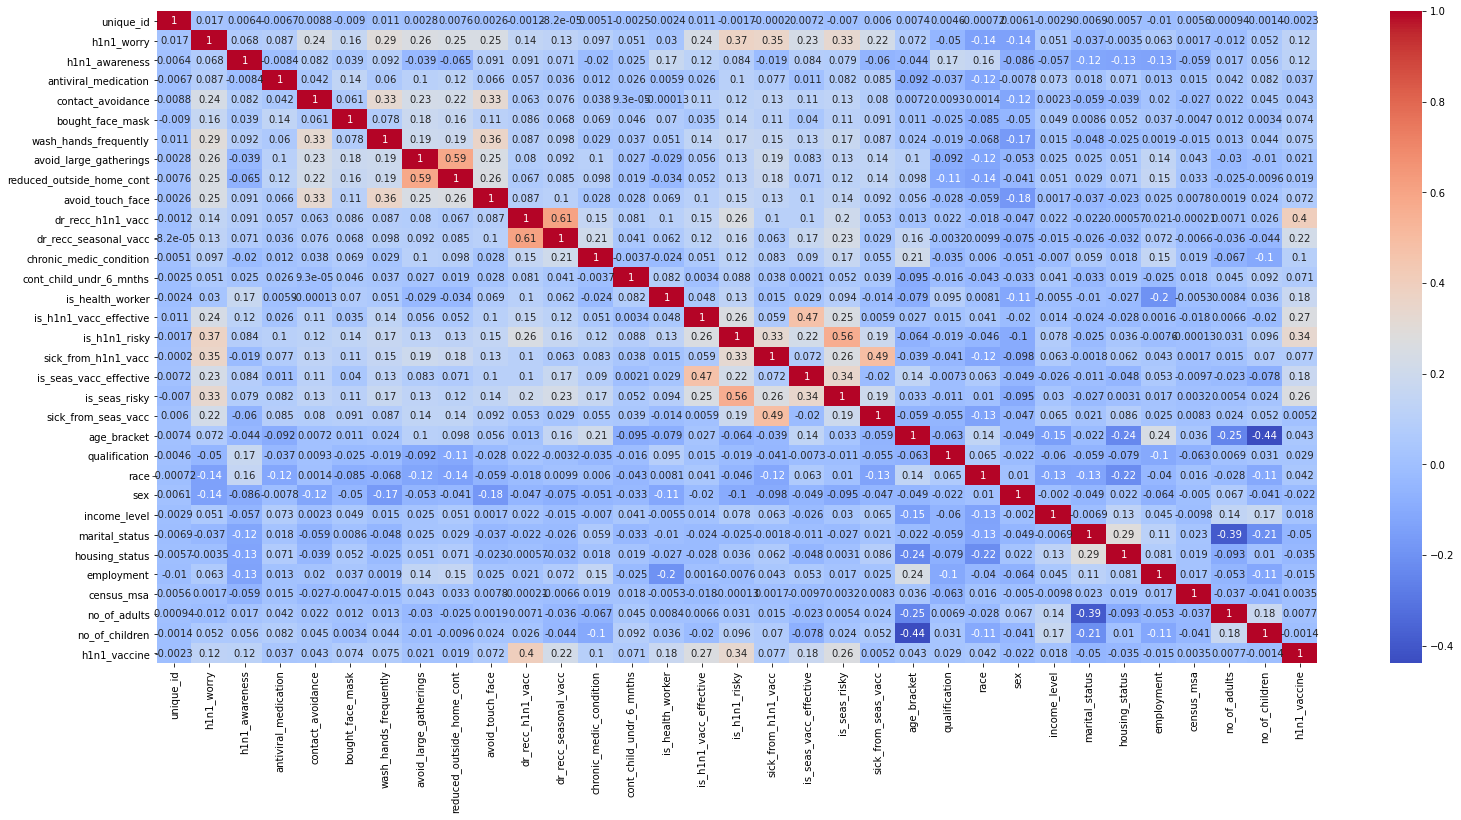

In [51]:
plt.figure(figsize=(26,12))
sns.heatmap(my_data_corr,annot=True,cmap='coolwarm')
plt.show()

# Graph 5 : JointPlot is used

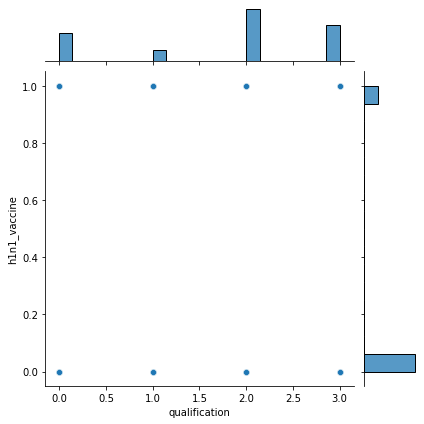

In [53]:
sns.jointplot(x="qualification",y='h1n1_vaccine',data=my_data);

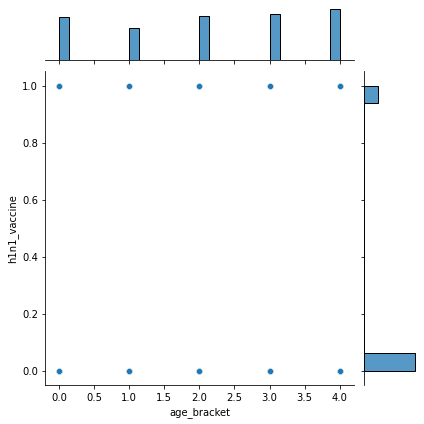

In [54]:
sns.jointplot(x="age_bracket",y='h1n1_vaccine',data=my_data);

# Graph 6 : Catplot is used

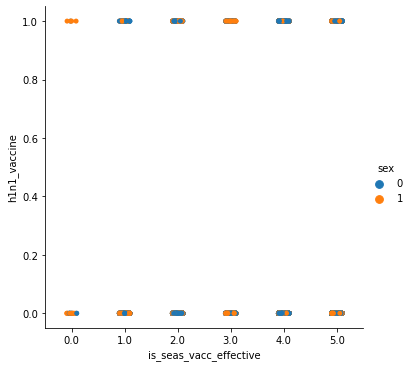

In [56]:
sns.catplot(x='is_seas_vacc_effective',y='h1n1_vaccine',hue='sex',data=my_data);

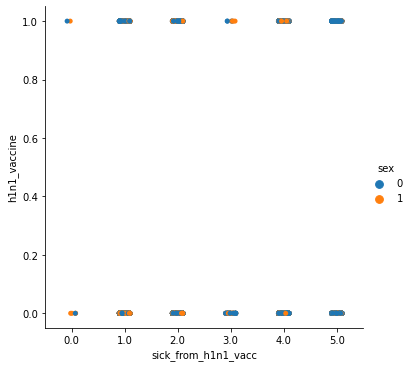

In [57]:
sns.catplot(x='sick_from_h1n1_vacc',y='h1n1_vaccine',hue='sex',data=my_data);

# Graph 7: Barplot is used

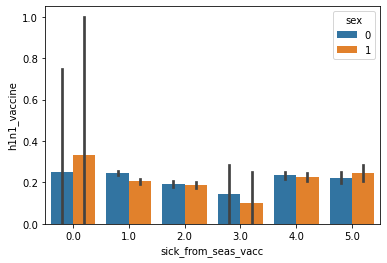

In [59]:
sns.barplot(x='sick_from_seas_vacc',y='h1n1_vaccine',hue='sex',data=my_data);

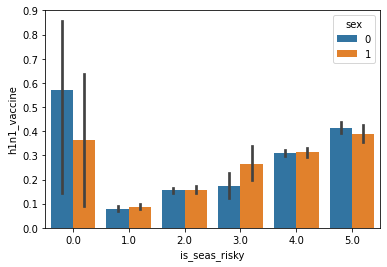

In [60]:
sns.barplot(x='is_seas_risky',y='h1n1_vaccine',hue='sex',data=my_data);

# Seperating the dependant variable and store it in a variable y_dep

# Dependant Variable

In [37]:
y_dep = my_data.h1n1_vaccine
y_dep

0        0
1        0
3        0
4        0
5        0
        ..
26700    0
26701    0
26702    0
26703    0
26706    0
Name: h1n1_vaccine, Length: 19642, dtype: int64

# Seperating all the independant variable and store it in a variable x_ind

# Independant Variable

In [40]:
x_ind = my_data.iloc[:,0:32]
x_ind

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1,3,0,2,1,0,1,2,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,3,1,2,1,1,0,0,0.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,3,0,2,1,1,1,1,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,3,0,0,0,0,0,0,1.0,0.0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,3,1,0,0,0,0,1,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,3,0,1,0,0,1,1,1.0,0.0
26701,26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,2,3,0,1,1,1,1,1,3.0,0.0
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,3,3,0,0,1,0,1,2,0.0,0.0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2,3,1,0,1,1,0,1,1.0,0.0


# Check for AIC and P value

# Splitting the test and train dataset

In [42]:
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,train_size=0.8,random_state=1)

# Fit the train data

In [45]:
import statsmodels.api as sm

In [46]:
model_stat=sm.Logit(y_train,x_train).fit();

Optimization terminated successfully.
         Current function value: 0.428522
         Iterations 6


In [47]:
model_stat.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.205     
Dependent Variable:    h1n1_vaccine        AIC:                 13530.7329
Date:                  2021-08-31 23:05    BIC:                 13775.9247
No. Observations:      15713               Log-Likelihood:      -6733.4   
Df Model:              31                  LL-Null:             -8465.2   
Df Residuals:          15681               LLR p-value:         0.0000    
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        6.0000                                             
--------------------------------------------------------------------------
                           Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
unique_id                 -0.0000   0.0000  -6.2682 0.0000 -0.0000 -0.0000
h1n1_worry                -0.1179   0.0299  -3.9424 0.0001 -0.1765 -0.0593
h1n1_awareness            -0.0484   0.0385  -1.2555 0.2093 -0.1239  0.0272
antiviral_medication       0.0447   0.1007   0.4439 0.6571 -0.1527  0.2420
contact_avoidance         -0.1839   0.0548  -3.3537 0.0008 -0.2914 -0.0764
bought_face_mask           0.2312   0.0852   2.7140 0.0066  0.0642  0.3982
wash_hands_frequently     -0.4086   0.0657  -6.2218 0.0000 -0.5373 -0.2799
avoid_large_gatherings    -0.1599   0.0583  -2.7444 0.0061 -0.2741 -0.0457
reduced_outside_home_cont -0.0229   0.0592  -0.3871 0.6987 -0.1390  0.0931
avoid_touch_face          -0.0724   0.0534  -1.3562 0.1750 -0.1771  0.0322
dr_recc_h1n1_vacc          2.0081   0.0649  30.9335 0.0000  1.8809  2.1354
dr_recc_seasonal_vacc     -0.5640   0.0638  -8.8357 0.0000 -0.6891 -0.4389
chronic_medic_condition    0.1725   0.0498   3.4667 0.0005  0.0750  0.2701
cont_child_undr_6_mnths    0.1471   0.0756   1.9469 0.0515 -0.0010  0.2952
is_health_worker           0.8357   0.0629  13.2855 0.0000  0.7124  0.9590
is_h1n1_vacc_effective     0.2475   0.0263   9.4206 0.0000  0.1960  0.2990
is_h1n1_risky              0.4285   0.0213  20.1526 0.0000  0.3869  0.4702
sick_from_h1n1_vacc       -0.0602   0.0196  -3.0726 0.0021 -0.0986 -0.0218
is_seas_vacc_effective    -0.1446   0.0244  -5.9356 0.0000 -0.1924 -0.0969
is_seas_risky              0.1854   0.0204   9.1047 0.0000  0.1455  0.2253
sick_from_seas_vacc       -0.2006   0.0194 -10.3317 0.0000 -0.2387 -0.1626
age_bracket               -0.0746   0.0187  -3.9931 0.0001 -0.1112 -0.0380
qualification             -0.1395   0.0203  -6.8864 0.0000 -0.1793 -0.0998
race                      -0.2553   0.0235 -10.8650 0.0000 -0.3013 -0.2092
sex                       -0.1765   0.0453  -3.8929 0.0001 -0.2654 -0.0876
income_level              -0.1038   0.0332  -3.1276 0.0018 -0.1688 -0.0387
marital_status            -0.7539   0.0505 -14.9421 0.0000 -0.8528 -0.6550
housing_status            -0.4003   0.0582  -6.8778 0.0000 -0.5143 -0.2862
employment                -0.0149   0.0401  -0.3729 0.7092 -0.0935  0.0636
census_msa                -0.0904   0.0263  -3.4409 0.0006 -0.1419 -0.0389
no_of_adults              -0.3669   0.0342 -10.7437 0.0000 -0.4338 -0.3000
no_of_children            -0.2665   0.0274  -9.7199 0.0000 -0.3202 -0.2128
==========================================================================

"""

In [48]:
#Check for AIC and p value
# when p is greater than 0.05, its not statistically significant

# Training logistic regression model

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model1=LogisticRegression()

# Fit the model

In [53]:
model1.fit(x_train,y_train)

LogisticRegression()

# Model Predict

In [55]:
y_pred=model1.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

# Check for machine Predicted and Actual

In [57]:
#Check for actual and machine predicted (true positive,true negative,false positive & false negative)
#check whether the machine predicted and the actual one matches

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
confusion_matrix(y_test,y_pred)

array([[2834,  188],
       [ 629,  278]], dtype=int64)

# Accuracy of the Model

In [61]:
from sklearn.metrics import accuracy_score   

In [62]:
accuracy_score(y_test,y_pred) 

0.7920590481038432

# Accuracy of the model is around 79%

# To improve the accuracy, optimizer (RoC) is used

# OPTIMIZER

# RoC Curve - (Receiver operating characteristic curve )
# RoC is used to find the threshold point

In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# AUC SCORE

In [68]:
logis_roc_auc=roc_auc_score(y_test,y_pred)
logis_roc_auc

0.6221472523800108

In [69]:
fpr,tpr,thresholds=roc_curve(y_test,model1.predict_proba(x_test)[:,1])              #[:,1] - for 1st column (PROBABILITY COLUMN)
                                                                                    #fpr - false positive rate
                                                                                    #tpr- true positive rate

# Graphical Representation of RoC optimizer

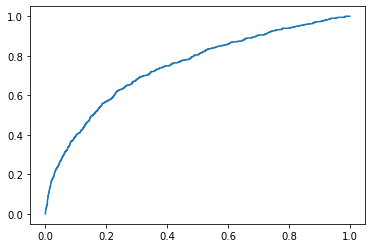

In [70]:
plt.plot(fpr,tpr,logis_roc_auc)

In [147]:
roc_threshold=LogisticRegression(class_weight='balanced')
roc_threshold.fit(x_train,y_train)
THRESHOLD=0.79

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [148]:
y_pred_roc=np.where(roc_threshold.predict_proba(x_test)[:,1]>THRESHOLD,1,0)

# Machine Predicted value of optimizer Roc

In [149]:
y_pred_roc

array([0, 0, 1, ..., 0, 0, 0])

# Accuracy for RoC Optimizer

In [150]:
accuracy_score(y_test,y_pred_roc)

0.8070755917536269

In [ ]:
# The Accuracy increased from 0.7920590481038432 to 0.8070755917536269        (79% to 81%)

# MODEL PERFORMANCE

# CLASSIFICATION REPORT

In [140]:
from sklearn.metrics import classification_report

In [141]:
class_report = classification_report(y_test,y_pred_roc)

In [142]:
print(class_report)

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      3022
           1       0.65      0.36      0.46       907

    accuracy                           0.81      3929
   macro avg       0.74      0.65      0.67      3929
weighted avg       0.79      0.81      0.79      3929



# CONCLUSION

### Accuracy of the model - 0.7920590481038432 (79%)
### Accuracy of the model(after optimization (RoC)) - 0.8070755917536269 (81%)

### By using the given dataset and predicting by using logistic regression,The accuracy of the given model is around 79% which is a good model


### The optimization (RoC) is also used to improve the accuracy of the given model and it improved the accuracy to 81%